## Import Libraries

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import joblib

## Data Cleaning

In [12]:
# import dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

In [13]:
# shape of data
df.shape

(7043, 21)

In [24]:
# top 3 rows
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [15]:
# drop the customerID column
df = df.drop("customerID", axis=1)

In [16]:
# check for null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
# check datatypes of columns
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [18]:
# TotalCharges column contains empty string values or nan values
df[df.TotalCharges==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [19]:
# check the shape of nan values
df[df.TotalCharges==" "].shape

(11, 20)

In [22]:
# removing rows with nan values
df = df[df.TotalCharges!=" "]

In [25]:
# shape after removing nan values
df.shape

(7032, 20)

In [27]:
# convert string values of TotalCharges into numeric values
df["TotalCharges"] = df.TotalCharges.astype("float64")

In [34]:
# check the unique values in each column
for column in df :
    print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

- Replace 'No phone service' values in MultipleLines with No
- Replace 'No internet service' values in  OnlineSecurity with No
- Replace 'No internet service' values in OnlineBackup with No
- Replace 'No internet service' values in TechSupport with No
- Replace 'No internet service' values in StreamingTV with No
- Replace 'No internet service' values in StreamingMovies with No

In [36]:
df = df.replace({"No phone service" : "No", "No internet service" : "No"})

In [37]:
# check the unique values in each column
for column in df :
    print(f"{column} : {df[column].unique()}")

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


- convert No to 0 and Yes to 1 in ["Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

In [39]:
cols_to_replace_with_0_1 = ["Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
                            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
                            "PaperlessBilling", "Churn"]

In [42]:
for col in cols_to_replace_with_0_1 :
    df.replace({"Yes" : 1, "No" : 0}, inplace=True)

In [44]:
# replace Female with 1 and Male with 0
df.replace({"Female" : 1, "Male" : 0}, inplace=True)

In [45]:
# check the unique values in each column
for column in df :
    print(f"{column} : {df[column].unique()}")

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


## Exploratory data analysis

In [46]:
df[df.Churn==1].shape

(1869, 20)

In [47]:
df[df.Churn==0].shape

(5163, 20)

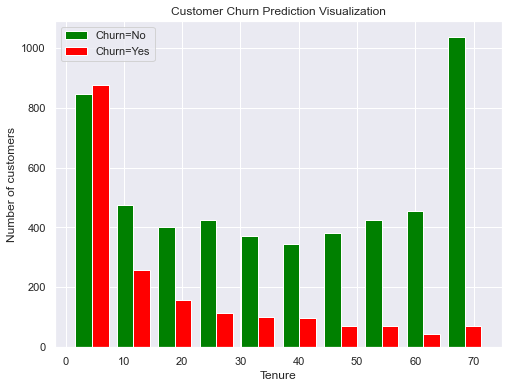

In [89]:
plt.figure(figsize=(8,6))
df_tenure_no = df[df.Churn==0].tenure
df_tenure_yes = df[df.Churn==1].tenure

plt.hist([df_tenure_no, df_tenure_yes], color=["green", "red"], label=["Churn=No", "Churn=Yes"])
plt.legend()
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer Churn Prediction Visualization")
plt.show()

- From this graph we can say that : 
- customers with high tenure will less probably leave the firm in comparison to the customers who leave the firm with less tenure

In [63]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


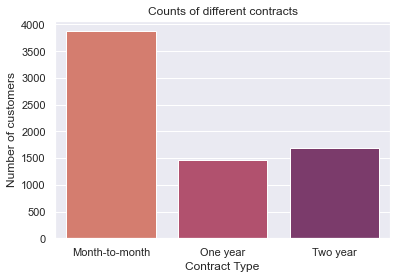

In [108]:
plt.figure(figsize=(6,4))
sns.set_theme()
sns.countplot(data=df, x="Contract", palette="flare")
plt.xlabel("Contract Type")
plt.ylabel("Number of customers")
plt.title("Counts of different contracts")
print(df.Contract.value_counts())
plt.show()

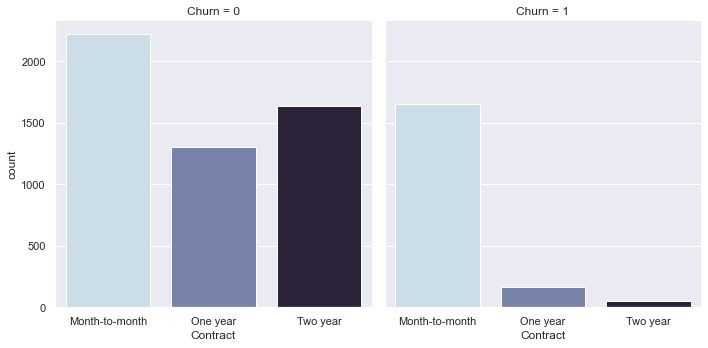

In [107]:
sns.catplot(x="Contract", col="Churn", data=df, kind="count", palette="ch:s=.25,rot=-.25", linewidth=1)
plt.show()

- From this graph we can say that :
- Customers with Two year contracts are less likely to leave

## Data Preprocessing

### Part1 : One hot encoding

In [140]:
df1 = df.copy()

In [141]:
col_for_ohe = ["InternetService", "Contract", "PaymentMethod"]

In [142]:
df1 = pd.get_dummies(df1, columns=col_for_ohe)

In [143]:
df1.shape

(7032, 27)

In [144]:
df1.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5723,0,0,0,0,58,1,1,0,0,0,...,0,0,1,1,0,0,1,0,0,0
805,1,0,1,1,72,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
3883,1,0,0,0,12,1,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0


### Part2 : Splicing of data

In [145]:
X = df1.drop("Churn", axis=1)
y = df1.Churn

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [147]:
X_train.shape

(5625, 26)

In [148]:
X_test.shape

(1407, 26)

In [149]:
y_train.shape

(5625,)

In [150]:
y_test.shape

(1407,)

### Part3 : Scaling of data

In [159]:
data_to_be_scaled = ["tenure", "MonthlyCharges", "TotalCharges"]

In [154]:
scaler = MinMaxScaler()
scaler.fit(X_train[data_to_be_scaled])
X_train[data_to_be_scaled] = scaler.transform(X_train[data_to_be_scaled])
X_test[data_to_be_scaled] = scaler.transform(X_test[data_to_be_scaled])

In [156]:
X_train.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3739,0,0,0,0,0.323944,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
106,1,0,1,1,1.000000,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
1277,1,0,1,1,1.000000,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [161]:
X_train.shape

(5625, 26)

## ANN Model Creation

In [162]:
%%timeit -n1 -r1
ann_model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1,  activation="sigmoid")
])

ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

ann_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
176/176 [==============================] - 3s 3ms/step - loss: 0.5317 - accuracy: 0.7326
Epoch 2/5
176/176 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.7920
Epoch 3/5
176/176 [==============================] - 0s 3ms/step - loss: 0.4250 - accuracy: 0.7968
Epoch 4/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4194 - accuracy: 0.7986
Epoch 5/5
176/176 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8023
9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [192]:
ann_model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation="relu"),
    keras.layers.Dense(17, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(12, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(7, activation="relu"),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(1,  activation="sigmoid")
])

ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

ann_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 0.5252 - accuracy: 0.7342: 0s - loss: 0
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4392 - accuracy: 0.7714: 0s - los
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4313 - accuracy: 0.7975
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4266 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4238 - accuracy: 0.8027: 0s - loss: 0.4202 - accuracy
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4217 - accuracy: 0.8043
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4206 - accuracy: 0.8043
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8060: 0s - los
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4162 - accuracy: 0.8057
Epoch 10/100
176/176 [=====

176/176 [==============================] - 1s 5ms/step - loss: 0.3486 - accuracy: 0.8441
Epoch 74/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3509 - accuracy: 0.8425: 0s - loss: 0.3 - ETA: 0s - loss: 0.3499 - accuracy
Epoch 75/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3484 - accuracy: 0.8434
Epoch 76/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3443 - accuracy: 0.8471
Epoch 77/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3449 - accuracy: 0.8444
Epoch 78/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3426 - accuracy: 0.8480
Epoch 79/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3429 - accuracy: 0.8473: 0s - loss: 0.336
Epoch 80/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3409 - accuracy: 0.8487: 0s - loss:
Epoch 81/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3397 - accuracy: 0.8494
Epoch 82/100


In [193]:
ann_model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7719


[0.5596877932548523, 0.7718549966812134]

In [194]:
yp = ann_model.predict(X_test)
yp[:5]

array([[0.00239531],
       [0.04220334],
       [0.7954605 ],
       [0.01961755],
       [0.01400107]], dtype=float32)

In [195]:
y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [196]:
y_pred = []
for ele in yp :
    if (ele>=0.5) :
        y_pred.append(1)
    else :
        y_pred.append(0)

In [197]:
y_pred[:5]

[0, 0, 1, 0, 0]

## Confusion matrix and Classification report

In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.58      0.54      0.56       374

    accuracy                           0.77      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



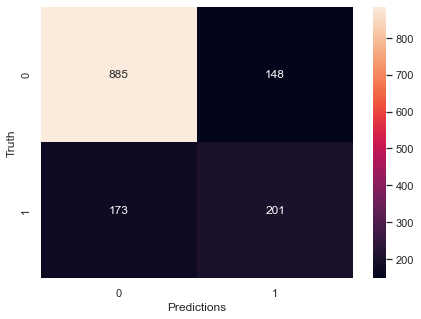

In [199]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.show()

## Save model 

In [207]:
ann_model.save("ann_model_for_churn_prediction")

INFO:tensorflow:Assets written to: ann_model_for_churn_prediction\assets


In [208]:
loaded_model = tf.keras.models.load_model("ann_model_for_churn_prediction")

In [209]:
loaded_model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7719


[0.5596877932548523, 0.7718549966812134]